In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ca68cf5-45ea-4805-8dbf-21e5dc09bd5a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-10-20T10:21:47.605Z,0,None,22,1,None,8845


In [5]:
df = pd.json_normalize(data['data'])

In [28]:
df['timestamp'] = pd.to_datetime('now')

df


C:\Users\jasus\AppData\Local\Temp\ipykernel_22120\3283999105.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19518900.000000,19518900.000000,False,NaN,1,NaN,NaN,None,2023-10-20T10:13:00.000Z,29901.743503,20134561512.597572,83.892300,0.549590,4.878602,11.788343,10.684918,15.125238,-0.083932,583649141260.524780,51.677000,627936613562.800049,None,2023-10-20T10:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 10:15:30.370216
1,1027,Ethereum,ETH,ethereum,7576,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120264972.342692,120264972.342692,True,NaN,2,NaN,NaN,None,2023-10-20T10:13:00.000Z,1621.702751,6239967971.829243,40.327200,0.700446,4.339454,5.051504,-0.301354,-2.783603,-14.061634,195034036516.095642,17.253200,195034036516.100006,None,2023-10-20T10:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 10:15:30.370216
2,825,Tether USDt,USDT,tether,64062,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83925456770.125305,87625667477.813400,True,NaN,3,NaN,NaN,None,2023-10-20T10:13:00.000Z,1.000868,38423735631.686043,23.318800,0.036141,0.062724,0.131571,0.072939,0.120224,0.074764,83998335605.409790,7.431500,87701759486.509995,None,2023-10-20T10:13:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-20 10:15:30.370216
3,1839,BNB,BNB,bnb,1689,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151705325.956878,151705325.956878,False,NaN,4,NaN,NaN,None,2023-10-20T10:13:00.000Z,215.666866,334225898.247832,26.917100,0.388834,2.465875,5.082548,0.066728,1.349614,-11.110183,32717812206.338116,2.894600,32717812206.340000,None,2023-10-20T10:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 10:15:30.370216
4,52,XRP,XRP,xrp,1119,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53441027384.000000,99988362642.000000,False,NaN,5,NaN,NaN,None,2023-10-20T10:13:00.000Z,0.517691,1745672425.577168,122.898500,0.442847,7.601760,7.717337,0.685204,-0.663788,-32.906495,27665916473.341888,2.447400,51769058020.809998,None,2023-10-20T10:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 10:15:30.370216
5,3408,USDC,USDC,usd-coin,14531,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25513206070.687004,25513206070.687004,False,NaN,6,NaN,NaN,None,2023-10-20T10:13:00.000Z,1.000475,3278675329.123705,38.467800,0.043494,0.054069,0.048879,0.027537,0.032709,0.043487,25525332537.147259,2.258700,25525332537.150002,None,2023-10-20T10:13:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-20 10:15:30.370216
6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416599090.114337,560381409.120064,True,NaN,7,NaN,NaN,None,2023-10-20T10:13:00.000Z,27.004993,997631937.539281,192.465000,-0.629612,11.970737,26.524401,35.057934,28.094615,5.631753,11250255311.255568,0.995300,15133095760.129999,None,2023-10-20T10:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 10:15:30.370216
7,2010,Cardano,ADA,cardano,948,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35220483669.543999,36274729240.532997,False,NaN,8,NaN,NaN,None,2023-10-20T10:13:00.000Z,0.251885,132336724.637856,18.340400,0.179826,3.909230,2.554061,-0.06873

In [16]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ca68cf5-45ea-4805-8dbf-21e5dc09bd5a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\Users\jasus\OneDrive\Documents\Python Projects\API.csv'):
        df.to_csv(r'C:\Users\jasus\OneDrive\Documents\Python Projects\API.csv' , header = 'cloumn_names')   
    else:
        df.to_csv(r'C:\Users\jasus\OneDrive\Documents\Python Projects\API.csv', mode = 'a', header = False)
    
 
    

In [17]:
import os
from time import time
from time import sleep

for i in range(330):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()    
  

C:\Users\jasus\AppData\Local\Temp\ipykernel_22120\1562289388.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\jasus\AppData\Local\Temp\ipykernel_22120\1562289388.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\jasus\AppData\Local\Temp\ipykernel_22120\1562289388.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [8]:
df = pd.read_csv(r'C:\Users\jasus\OneDrive\Documents\Python Projects\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19518725.000000,19518725.000000,False,NaN,1,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,29292.309783,17566878017.445934,57.659100,0.071796,3.450503,8.899256,8.016936,12.557433,-2.243238,571748539276.590088,51.499600,615138505450.969971,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
1,1,1027,Ethereum,ETH,ethereum,7574,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120264972.342692,120264972.342692,True,NaN,2,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,1587.893163,5298877824.966452,17.167300,0.237133,2.290570,2.358860,-2.972464,-4.999167,-16.168050,190967927374.305389,17.193000,190967927374.309998,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
2,2,825,Tether USDt,USDT,tether,64060,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83925456770.125305,87625667477.813400,True,NaN,3,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,1.000489,35219462500.497704,11.545800,-0.010912,0.025134,0.058158,0.030149,0.088219,0.052997,83966493453.092377,7.558400,87668513437.479996,NaN,2023-10-20T07:37:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-20 07:38:54.674218
3,3,1839,BNB,BNB,bnb,1689,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151705351.251571,151705351.251571,False,NaN,4,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,213.380716,301874493.351793,14.511800,0.248991,1.651012,3.642494,-1.482173,-0.563173,-12.489585,32370996464.281887,2.914000,32370996464.279999,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
4,4,52,XRP,XRP,xrp,1119,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,53441027384.000000,99988362642.000000,False,NaN,5,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,0.512632,1654233213.722731,110.066900,0.319150,6.957529,6.205772,-0.776199,-1.656148,-33.827466,27395559199.209587,2.466400,51263159673.860001,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
5,5,3408,USDC,USDC,usd-coin,14531,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25500181401.698948,25500181401.698948,False,NaN,6,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,1.000006,2888931392.144069,17.254600,-0.016911,-0.005323,-0.022665,-0.010888,-0.004149,0.001521,25500333505.315163,2.296500,25500333505.320000,NaN,2023-10-20T07:37:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-20 07:38:54.674218
6,6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,416599248.229251,560381567.768281,True,NaN,7,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,26.438534,853800365.236725,153.377300,0.923539,10.953434,23.286065,32.689258,23.722543,2.769133,11014273357.443151,0.991500,14815667090.389999,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
7,7,2010,Cardano,ADA,cardano,948,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,35219918756.162003,36274729240.532997,False,NaN,8,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,0.249150,116796011.158691,2.553500,0.027767,2.823340,

In [6]:
 pd.set_option('display.float_format', lambda x: '%5f' %x)


In [9]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10496,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19518725.000000,19518725.000000,False,NaN,1,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,29292.309783,17566878017.445934,57.659100,0.071796,3.450503,8.899256,8.016936,12.557433,-2.243238,571748539276.590088,51.499600,615138505450.969971,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
1,1,1027,Ethereum,ETH,ethereum,7574,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120264972.342692,120264972.342692,True,NaN,2,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,1587.893163,5298877824.966452,17.167300,0.237133,2.290570,2.358860,-2.972464,-4.999167,-16.168050,190967927374.305389,17.193000,190967927374.309998,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
2,2,825,Tether USDt,USDT,tether,64060,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83925456770.125305,87625667477.813400,True,NaN,3,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,1.000489,35219462500.497704,11.545800,-0.010912,0.025134,0.058158,0.030149,0.088219,0.052997,83966493453.092377,7.558400,87668513437.479996,NaN,2023-10-20T07:37:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-20 07:38:54.674218
3,3,1839,BNB,BNB,bnb,1689,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151705351.251571,151705351.251571,False,NaN,4,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,213.380716,301874493.351793,14.511800,0.248991,1.651012,3.642494,-1.482173,-0.563173,-12.489585,32370996464.281887,2.914000,32370996464.279999,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
4,4,52,XRP,XRP,xrp,1119,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,53441027384.000000,99988362642.000000,False,NaN,5,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,0.512632,1654233213.722731,110.066900,0.319150,6.957529,6.205772,-0.776199,-1.656148,-33.827466,27395559199.209587,2.466400,51263159673.860001,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
5,5,3408,USDC,USDC,usd-coin,14531,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25500181401.698948,25500181401.698948,False,NaN,6,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,1.000006,2888931392.144069,17.254600,-0.016911,-0.005323,-0.022665,-0.010888,-0.004149,0.001521,25500333505.315163,2.296500,25500333505.320000,NaN,2023-10-20T07:37:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-20 07:38:54.674218
6,6,5426,Solana,SOL,solana,537,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,416599248.229251,560381567.768281,True,NaN,7,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,26.438534,853800365.236725,153.377300,0.923539,10.953434,23.286065,32.689258,23.722543,2.769133,11014273357.443151,0.991500,14815667090.389999,NaN,2023-10-20T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-20 07:38:54.674218
7,7,2010,Cardano,ADA,cardano,948,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,35219918756.162003,36274729240.532997,False,NaN,8,NaN,NaN,NaN,2023-10-20T07:37:00.000Z,0.249150,116796011.158691,2.553500,0.027767,2.823340,

In [12]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.104882,3.465614,8.940830,8.030065,12.579154,-2.216275
Ethereum,0.250325,2.300308,2.412311,-2.965860,-5.003186,-16.153298
Tether USDt,-0.005979,0.027078,0.062190,0.034696,0.095797,0.032434
BNB,0.249052,1.654113,3.660273,-1.479446,-0.563301,-12.487228
XRP,0.323321,6.964869,6.220973,-0.771048,-1.647901,-33.823437
USDC,-0.004589,-0.005469,-0.021768,-0.007603,0.004726,0.000020
Solana,0.924327,10.951180,23.310468,32.685801,23.715705,2.774655
Cardano,0.028258,2.830068,1.004895,-1.673831,-6.950974,-20.352269
Dogecoin,0.088275,2.194473,2.492788,-4.622755,-5.906876,-17.927427


In [15]:
pd.set_option('display.max_row', None)

df4 = df3.stack()
df4


name                                         
Bitcoin          quote.USD.percent_change_1h      0.104882
                 quote.USD.percent_change_24h     3.465614
                 quote.USD.percent_change_7d      8.940830
                 quote.USD.percent_change_30d     8.030065
                 quote.USD.percent_change_60d    12.579154
                 quote.USD.percent_change_90d    -2.216275
Ethereum         quote.USD.percent_change_1h      0.250325
                 quote.USD.percent_change_24h     2.300308
                 quote.USD.percent_change_7d      2.412311
                 quote.USD.percent_change_30d    -2.965860
                 quote.USD.percent_change_60d    -5.003186
                 quote.USD.percent_change_90d   -16.153298
Tether USDt      quote.USD.percent_change_1h     -0.005979
                 quote.USD.percent_change_24h     0.027078
                 quote.USD.percent_change_7d      0.062190
                 quote.USD.percent_change_30d     0.034696
          

In [19]:
type(df3)

pandas.core.frame.DataFrame

In [41]:
type(df4)

pandas.core.series.Series

In [46]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                   
Bitcoin         quote.USD.percent_change_1h    0.104882
                quote.USD.percent_change_24h   3.465614
                quote.USD.percent_change_7d    8.940830
                quote.USD.percent_change_30d   8.030065
                quote.USD.percent_change_60d  12.579154
                quote.USD.percent_change_90d  -2.216275
Ethereum        quote.USD.percent_change_1h    0.250325
                quote.USD.percent_change_24h   2.300308
                quote.USD.percent_change_7d    2.412311
                quote.USD.percent_change_30d  -2.965860
                quote.USD.percent_change_60d  -5.003186
                quote.USD.percent_change_90d -16.153298
Tether USDt     quote.USD.percent_change_1h   -0.005979
                quote.USD.percent_change_24h   0.027078
                quote.USD.percent_change_7d    0.062190
                quote.USD.percent_change_30d   0.034696
                quote.USD.percent_change_60d   0.095797
                quote.USD.percent_change_90d   0.032434
BNB             quote.USD.percent_change_1h    0.249052
                quote.USD.percent_change_24h   1.654113
                quote.USD.percent_change_7d    3.660273
                quote.USD.percent_change_30d  -1.479446
                quote.USD.percent_change_60d  -0.563301
                quote.USD.percent_change_90d -12.487228
XRP             quote.USD.percent_change_1h    0.323321
                quote.USD.percent_change_24h   6.964869
                quote.USD.percent_change_7d    6.220973
                quote.USD.percent_change_30d  -0.771048
                quote.USD.percent_change_60d  -1.647901
                quote.USD.percent_change_90d -33.823437
USDC            quote.USD.percent_change_1h   -0.004589
                quote.USD.percent_change_24h  -0.005469
                quote.USD.percent_change_7d   -0.021768
                quote.USD.percent_change_30d  -0.007603
                quote.USD.percent_change_60d   0.004726
                quote.USD.percent_change_90d   0.000020
Solana          quote.USD.percent_change_1h    0.924327
                quote.USD.percent_change_24h  10.951180
                quote.USD.percent_change_7d   23.310468
                quote.USD.percent_change_30d  32.685801
                quote.USD.percent_change_60d  23.715705
                quote.USD.percent_change_90d   2.774655
Cardano         quote.USD.percent_change_1h    0.028258
                quote.USD.percent_change_24h   2.830068
                quote.USD.percent_change_7d    1.004895
                quote.USD.percent_change_30d  -1.673831
                quote.USD.percent_change_60d  -6.950974
                quote.USD.percent_change_90d -20.352269
Dogecoin        quote.USD.percent_change_1h    0.088275
                quote.USD.percent_change_24h   2.194473
                quote.USD.percent_change_7d    2.492788
                quote.USD.percent_change_30d  -4.622755
                quote.USD.percent_change_60d  -5.906876
                quote.USD.percent_change_90d -17.927427
TRON            quote.USD.percent_change_1h    0.055930
                quote.USD.percent_change_24h   2.141388
                quote.USD.percent_change_7d    6.292299
                quote.USD.percent_change_30d   7.541656
                quote.USD.percent_change_60d  20.070618
                quote.USD.percent_change_90d   4.286088
Toncoin         quote.USD.percent_change_1h    1.113668
                quote.USD.percent_change_24h   3.426173
                quote.USD.percent_change_7d    7.943538
                quote.USD.percent_change_30d -16.036912
                quote.USD.percent_change_60d  54.085752
                quote.USD.percent_change_90d  47.129952
Dai             quote.USD.percent_change_1h    0.013892
                quote.USD.percent_change_24h   0.049518
                quote.USD.percent_change_7d    0.007214
                quote.USD.percent_change_30d   0.054774
                q

In [47]:
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.104882
1,Bitcoin,quote.USD.percent_change_24h,3.465614
2,Bitcoin,quote.USD.percent_change_7d,8.940830
3,Bitcoin,quote.USD.percent_change_30d,8.030065
4,Bitcoin,quote.USD.percent_change_60d,12.579154
5,Bitcoin,quote.USD.percent_change_90d,-2.216275
6,Ethereum,quote.USD.percent_change_1h,0.250325
7,Ethereum,quote.USD.percent_change_24h,2.300308
8,Ethereum,quote.USD.percent_change_7d,2.412311
9,Ethereum,quote.USD.percent_change_30d,-2.965860


In [49]:
df7 = df6.rename(columns= {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.104882
1,Bitcoin,quote.USD.percent_change_24h,3.465614
2,Bitcoin,quote.USD.percent_change_7d,8.940830
3,Bitcoin,quote.USD.percent_change_30d,8.030065
4,Bitcoin,quote.USD.percent_change_60d,12.579154
5,Bitcoin,quote.USD.percent_change_90d,-2.216275
6,Ethereum,quote.USD.percent_change_1h,0.250325
7,Ethereum,quote.USD.percent_change_24h,2.300308
8,Ethereum,quote.USD.percent_change_7d,2.412311
9,Ethereum,quote.USD.percent_change_30d,-2.965860


In [54]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,0.104882
1,Bitcoin,24h,3.465614
2,Bitcoin,7d,8.940830
3,Bitcoin,30d,8.030065
4,Bitcoin,60d,12.579154
5,Bitcoin,90d,-2.216275
6,Ethereum,1h,0.250325
7,Ethereum,24h,2.300308
8,Ethereum,7d,2.412311
9,Ethereum,30d,-2.965860


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

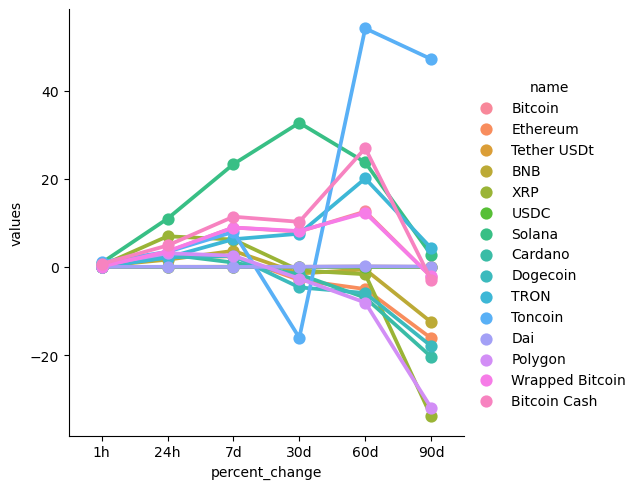

In [55]:
sns.catplot(x='percent_change',y='values', hue='name', data=df7, kind='point')

In [58]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")

df10

,name,quote.USD.price,timestamp
0,Bitcoin,29292.309783,2023-10-20 07:38:54.674218
15,Bitcoin,29302.868342,2023-10-20 07:39:55.237935
30,Bitcoin,29302.598401,2023-10-20 07:40:56.205522


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

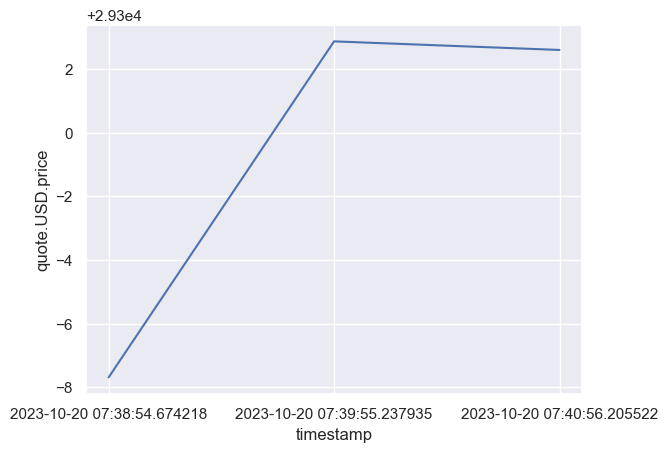

In [63]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)